In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.cm as cmx

In [34]:
norm = colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.gnuplot(norm(400),bytes=True)
rgba_color

(161, 16, 149, 255)

In [35]:
summaryBatch_global = pd.read_json("./global_par/summaryBatch.json")
summaryBatch_global = summaryBatch_global[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]

In [36]:
batch_global = pd.read_json("./global_par/batch.json")

In [37]:
summaryBatch_global

,k,clusters,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,[189],1.371114,1.371114,676.160150,1.284301,1.284301,633.348667,1.284301
1,2,"[95, 94]",1.000000,1.371114,341.647200,1.009352,1.287300,320.762883,1.275193
2,3,"[42, 34, 113]",1.000007,1.461032,492.058050,1.021967,1.316365,443.335850,1.303961
3,4,"[57, 63, 41, 28]",1.000127,1.485290,265.469917,1.049070,1.390578,240.844383,1.320364
4,5,"[50, 21, 40, 46, 32]",1.000355,1.637695,243.410700,1.077833,1.426521,190.383117,1.308784
5,6,"[33, 13, 71, 29, 24, 19]",1.010122,1.726447,383.596300,1.063379,1.415940,294.851850,1.298971


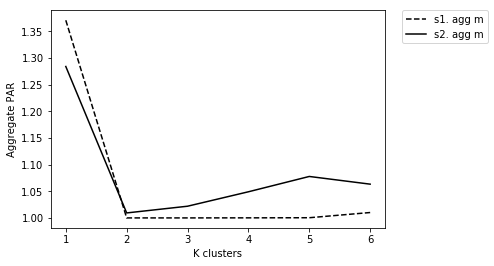

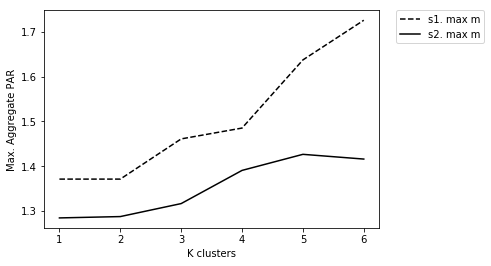

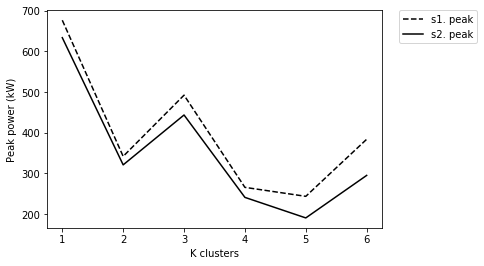

In [57]:
def plot_aggm(summary): 
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. agg m"], "--", color=rgba_color, label="s1. agg m")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. agg m"], color=rgba_color, label="s2. agg m")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Aggregate PAR',title='')
    plt.show()
    
def plot_maxm(summary): 
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. max m"], "--", color=rgba_color, label="s1. max m")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. max m"], color=rgba_color, label="s2. max m")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Max. Aggregate PAR',title='')
    plt.show()
    
def plot_peak(summary):
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. peak"], "--", color=rgba_color, label="s1. peak")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. peak"], color=rgba_color, label="s2. peak")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Peak power (kW)',title='')
    plt.show()
    
plot_aggm(summaryBatch_global)
plot_maxm(summaryBatch_global)
plot_peak(summaryBatch_global)

In [6]:
with open('summaryBatch.tex','w') as tf:
    tf.write(summaryBatch_global.to_latex())

In [58]:
def plot(data):
    for runIdx in range(0, len(data)):
        fig, ax = plt.subplots()
        clusters_step1 = data.iloc[runIdx]["steps"][0]["clusters"]
        clusters_step2 = data.iloc[runIdx]["steps"][1]["clusters"]
        norm = colors.Normalize(vmin=0, vmax=len(clusters_step1))
        for cIdx in range(0, len(clusters_step1)):
            rgba_color = cm.gnuplot(norm(cIdx))
            ax.plot(clusters_step1[cIdx]["syntheticCenter"], "--", color=rgba_color, label="cluster %s" % cIdx)
            ax.plot(clusters_step2[cIdx]["syntheticCenter"], color=rgba_color, label="cluster %s - rescheduled" % cIdx)
            print(clusters_step2[cIdx]["metric"])
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set(xlabel='Hours', ylabel='Power (kW)',title='')
        plt.show()

1.284300986527972


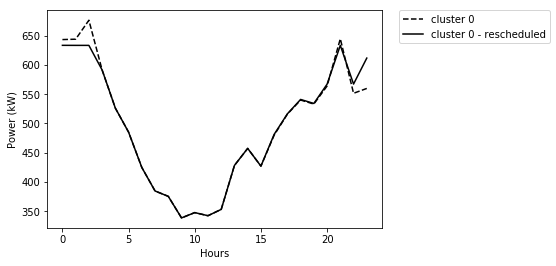

1.263446039311013
1.287300153061833


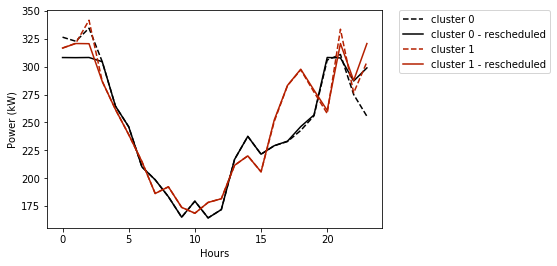

1.29382857483699
1.254017387657475
1.316365166490741


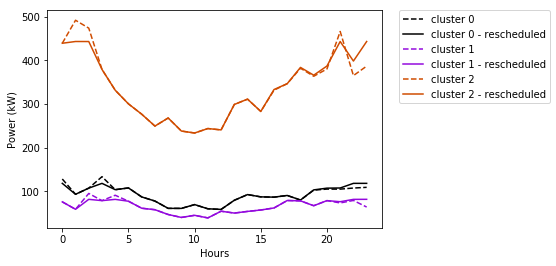

1.32092326781564
1.347511623891481
1.24312389476996
1.390577893992731


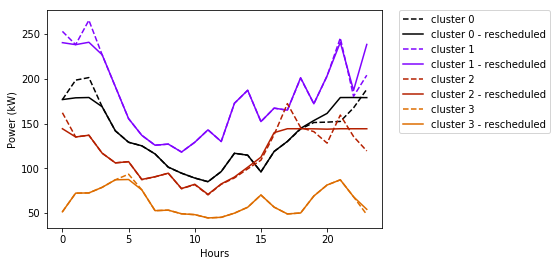

1.356562401303171
1.426521425043719
1.229111089524329
1.279530213351795
1.325818221920033


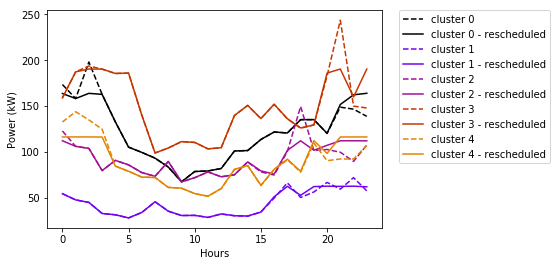

1.357119598654394
1.258540378903927
1.251841929795879
1.304873484719713
1.4159402805644001
1.400971655774254


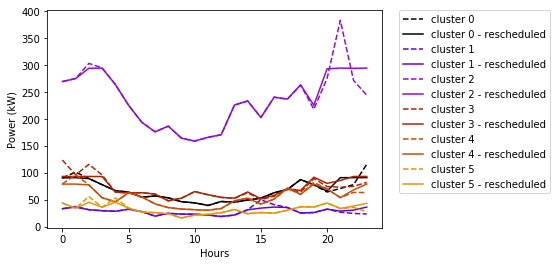

In [59]:
plot(batch_global)

In [60]:
summaryBatch_local = pd.read_json("./local_par/summaryBatch.json")
summaryBatch_local = summaryBatch_local[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]
batch_local = pd.read_json("./local_par/batch.json")

In [61]:
summaryBatch_local

,k,clusters,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,[189],1.371114,1.371114,676.160150,1.284301,1.284301,633.348667,1.284301
1,2,"[71, 118]",1.000000,1.399867,422.560117,1.003682,1.285334,385.141000,1.279518
2,3,"[50, 135, 4]",1.000045,1.378026,494.357733,1.056240,1.294426,464.366717,1.272688
3,4,"[23, 14, 3, 149]",1.000235,1.371130,522.809017,1.064128,1.323642,504.702250,1.302955
4,5,"[14, 16, 12, 5, 142]",1.001077,1.380518,511.882117,1.049105,1.312757,472.498133,1.261584
5,6,"[72, 71, 14, 13, 11, 8]",1.003333,1.567744,284.432333,1.130834,1.557311,236.555300,1.307056


1.284300986527972


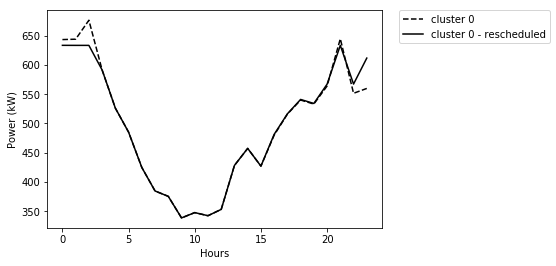

1.285333811395422
1.275904078278038


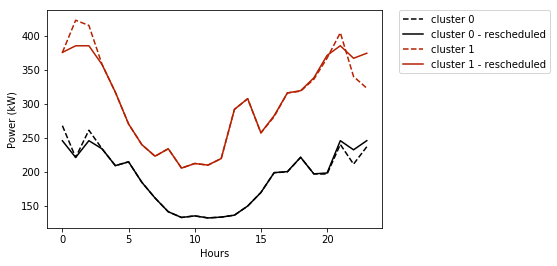

1.220818562744163
1.294426224946125
1.161265302367797


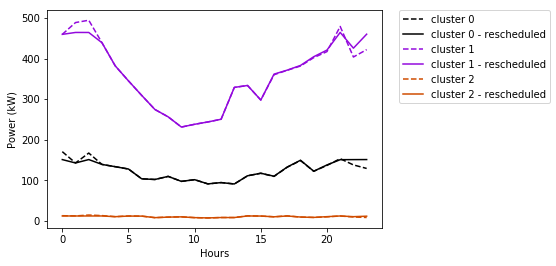

1.2692450511706461
1.196958965761743
1.185655751329328
1.323642329064224


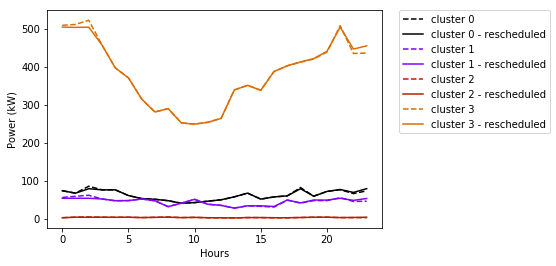

1.254092206980552
1.162909087228624
1.252495351815715
1.312757217142134
1.274301415427834


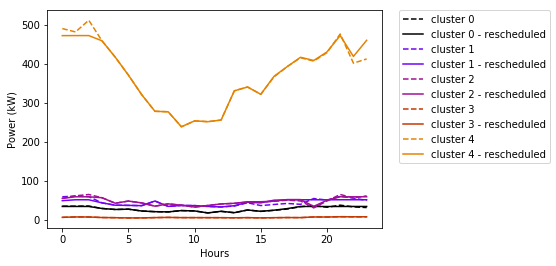

1.2531799902640741
1.2883441487125031
1.4210824106086881
1.292740027841091
1.4501501208935
1.557310728883287


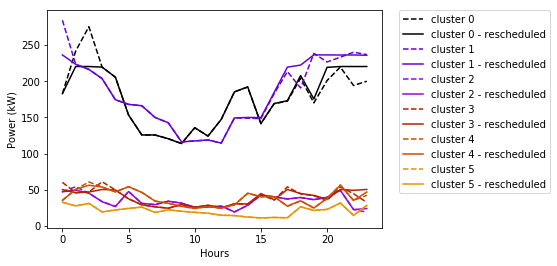

In [62]:
plot(batch_local)

In [63]:
summaryBatch_local_average = pd.read_json("./local_average/summaryBatch.json")
summaryBatch_local_average = summaryBatch_local[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]
batch_local_average = pd.read_json("./local_average/batch.json")

In [64]:
summaryBatch_local_average

,k,clusters,s1. agg m,s1. max m,s1. peak,s2. agg m,s2. max m,s2. peak,total m
0,1,[189],1.371114,1.371114,676.160150,1.284301,1.284301,633.348667,1.284301
1,2,"[71, 118]",1.000000,1.399867,422.560117,1.003682,1.285334,385.141000,1.279518
2,3,"[50, 135, 4]",1.000045,1.378026,494.357733,1.056240,1.294426,464.366717,1.272688
3,4,"[23, 14, 3, 149]",1.000235,1.371130,522.809017,1.064128,1.323642,504.702250,1.302955
4,5,"[14, 16, 12, 5, 142]",1.001077,1.380518,511.882117,1.049105,1.312757,472.498133,1.261584
5,6,"[72, 71, 14, 13, 11, 8]",1.003333,1.567744,284.432333,1.130834,1.557311,236.555300,1.307056


1.284300986527972


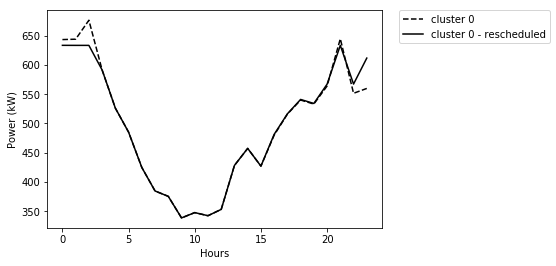

1.284300986527972
1


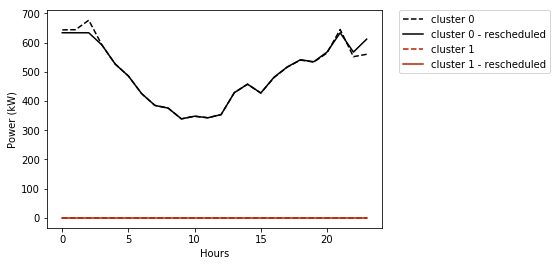

1
1
1.284300986527972


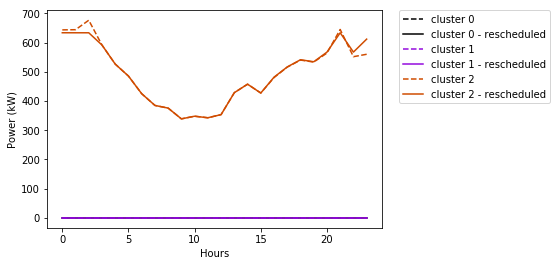

1
1
1.284300986527972
1


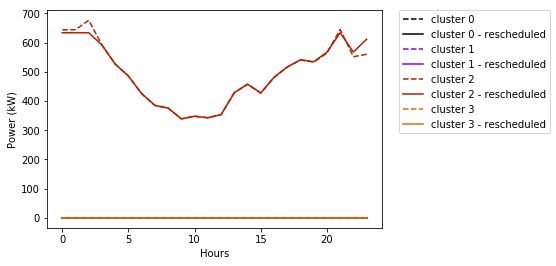

1
1
1
1.284300986527972
1


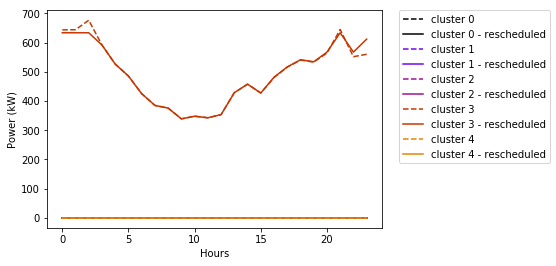

1
1
1
1.284300986527972
1
1


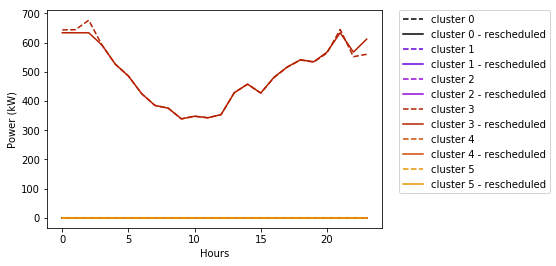

In [65]:
plot(batch_local_average)